In [1]:
import torch
from transformers import DPTFeatureExtractor, DPTForDepthEstimation
from PIL import Image
import requests
import numpy as np
import matplotlib.pyplot as plt

# Verificar versiones
print(f"Torch version: {torch.__version__}")





/Users/juan/Monocular Depth Estimation/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/juan/Monocular Depth Estimation/.venv/lib/python3.12/site-packages/transformers/utils/generic.py:311: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(


Torch version: 2.3.1


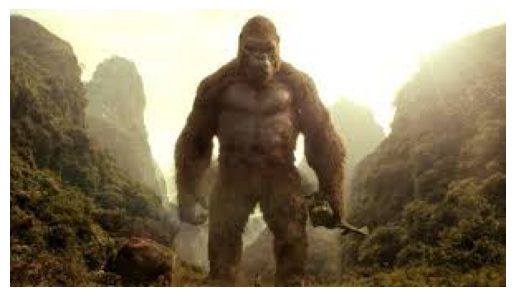

In [2]:
# Ruta de la imagen
path = "image/download.jpeg"
image = Image.open(path)

# Ajustar el tamaño de la imagen para facilitar el procesamiento
MAX_SIZE = (600, 400)
image.thumbnail(MAX_SIZE)
plt.imshow(image)
plt.axis('off')
plt.show()


In [3]:
# Cargar el modelo y el procesador MiDaS
feature_extractor = DPTFeatureExtractor.from_pretrained("Intel/dpt-large")
model = DPTForDepthEstimation.from_pretrained("Intel/dpt-large")



/Users/juan/Monocular Depth Estimation/.venv/lib/python3.12/site-packages/transformers/models/dpt/feature_extraction_dpt.py:28: FutureWarning: The class DPTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use DPTImageProcessor instead.
  warnings.warn(
Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution2.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [4]:
# Preparar la imagen para el modelo
inputs = feature_extractor(images=image, return_tensors="pt")
with torch.no_grad():
    outputs = model(**inputs)
    predicted_depth = outputs.predicted_depth

# Interpolar al tamaño original de la imagen
prediction = torch.nn.functional.interpolate(
    predicted_depth.unsqueeze(1),
    size=image.size[::-1],
    mode="bicubic",
    align_corners=False,
)


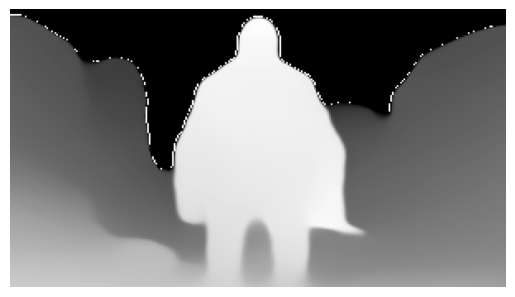

In [5]:
# Visualizar la predicción de profundidad
output = prediction.squeeze().cpu().numpy()
formatted = (output * 255 / np.max(output)).astype("uint8")
depth = Image.fromarray(formatted)
plt.imshow(depth, cmap='gray')
plt.axis('off')
plt.show()
